## Perceptron - XOR Problem

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Step 1. Data -  target : 0, 1 binary

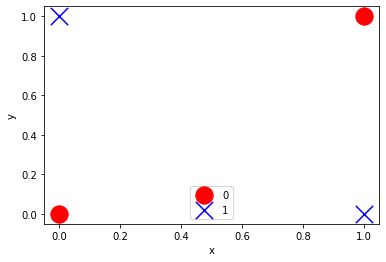

In [12]:
x_data = np.array([[0., 0.],
          [0., 1.],
          [1., 0.],
          [1., 1.]])
y_data = np.array([[0.],
          [1.],
          [1.],
          [0.]])

plt.scatter(x_data[0, 0], x_data[0, 1], s=300, color='red', marker='o')
plt.scatter(x_data[3, 0], x_data[3, 1], s=300, color='red', marker='o', label='0')
plt.scatter(x_data[1, 0], x_data[1, 1], s=300, color='blue', marker='x')
plt.scatter(x_data[2, 0], x_data[2, 1], s=300, color='blue', marker='x', label='1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower center')
plt.show()


### Step 2. Logistic Classification Model (input = 2, output = 1 with sigmoid function)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric

In [14]:
sgd = tf.keras.optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Step 4. Train the Model

In [15]:
history=model.fit(x_data, y_data, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 300ms/step - loss: 0.7355 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7346 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7340 - accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 0.7334 - accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7330 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7325 - accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7322 - accuracy: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7318 - accuracy: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7314 - accuracy: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7311 - accuracy: 0.2500
Epoch 11/100
1/1 [=========

### Step 5. Test the Model

In [16]:
score = model.evaluate(x_data, y_data, verbose=0)

In [17]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.7112566232681274
Test accuracy: 0.25


### Plot the Training loss

dict_keys(['loss', 'accuracy'])


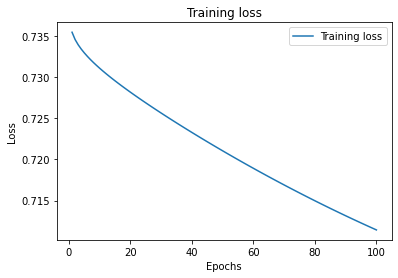

In [18]:
history_dict = history.history
print(history_dict.keys())

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training Accuracy

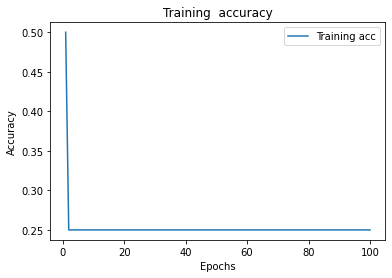

In [19]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']

plt.plot(epochs, acc, '-', label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### Plot the Decision Boundary

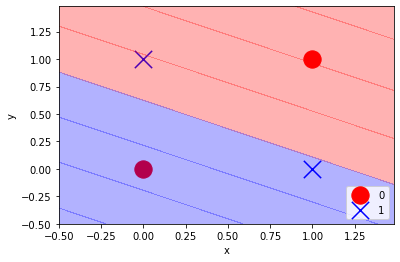

In [20]:
plt.scatter(x_data[0, 0], x_data[0, 1], s=300, color='red', marker='o')
plt.scatter(x_data[3, 0], x_data[3, 1], s=300, color='red', marker='o', label='0')
plt.scatter(x_data[1, 0], x_data[1, 1], s=300, color='blue', marker='x')
plt.scatter(x_data[2, 0], x_data[2, 1], s=300, color='blue', marker='x', label='1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

resolution=0.02
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
x1_min, x1_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
x2_min, x2_max = x_data[:, 1].min() - 0.5, x_data[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.show()